<a href="https://colab.research.google.com/github/Beentha/stutern/blob/master/Module8%2CAssignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [27]:
movies = pd.read_csv('/content/movies.csv')
movies.head()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN


In [28]:
movies.shape

(9999, 9)

In [29]:
movies.describe()

,RATING,RunTime
count,8179.000000,7041.000000
mean,6.921176,68.688539
std,1.220232,47.258056
min,1.100000,1.000000
25%,6.200000,36.000000
50%,7.100000,60.000000
75%,7.800000,95.000000
max,9.900000,853.000000


In [30]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MOVIES    9999 non-null   object 
 1   YEAR      9355 non-null   object 
 2   GENRE     9919 non-null   object 
 3   RATING    8179 non-null   float64
 4   ONE-LINE  9999 non-null   object 
 5   STARS     9999 non-null   object 
 6   VOTES     8179 non-null   object 
 7   RunTime   7041 non-null   float64
 8   Gross     460 non-null    object 
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [31]:
# Rename columns for uniformity
column_dict = {"MOVIES" : "Movies", 
               "YEAR" : "Year", 
               "GENRE" : "Genre",
              "RATING" : "Rating", 
               "ONE-LINE" : "One_Line", 
                "VOTES" : "Votes"}

movies.rename(columns=column_dict, inplace=True)

movies.columns

Index(['Movies', 'Year', 'Genre', 'Rating', 'One_Line', 'STARS', 'Votes',
       'RunTime', 'Gross'],
      dtype='object')

In [32]:
# check for duplicates
movies.duplicated().sum()

431

In [33]:
# Drop duplicates
movies.drop_duplicates(inplace=True)

In [34]:
# check for missing values
movies.isna().sum()

Movies         0
Year         542
Genre         78
Rating      1400
One_Line       0
STARS          0
Votes       1400
RunTime     2560
Gross       9108
dtype: int64

In [35]:
# check for percentage missing values
print("Missing Values:\n")
for column in movies.columns:
    missing = movies[column].isna().sum()
    percent = round(missing / movies.shape[0] * 100, 2)
    print(f"{column}: {percent} ({missing})")

Missing Values:

Movies: 0.0 (0)
Year: 5.66 (542)
Genre: 0.82 (78)
Rating: 14.63 (1400)
One_Line: 0.0 (0)
STARS: 0.0 (0)
Votes: 14.63 (1400)
RunTime: 26.76 (2560)
Gross: 95.19 (9108)


In [36]:
# Fill missing values in Year column and extract year appropriately
def extract_year(year):
  if year[-3:] == '– )':
      return year.replace('– )',"–")
  else:
      return year.replace(')',"")

movies['Year'] = movies['Year'].str.extract(r'([0-9]{4}–.*|[0-9]{4})')
movies['Year'] = movies['Year'].replace(np.nan, 'Unknown')
movies['Year'] = movies['Year'].apply(lambda yr:extract_year(str(yr)))
movies['Year']

0            2021
1           2021–
2       2010–2022
3           2013–
4            2021
          ...    
9993        2022–
9995        2021–
9996        2022–
9997        2021–
9998        2021–
Name: Year, Length: 9568, dtype: object

In [37]:
movies.Year.value_counts(normalize=True)

2020–        0.092182
2020         0.077341
2019         0.068666
Unknown      0.066367
2021–        0.058633
               ...   
1987–1995    0.000105
2001–2018    0.000105
1971         0.000105
2007–2014    0.000105
1985–        0.000105
Name: Year, Length: 265, dtype: float64

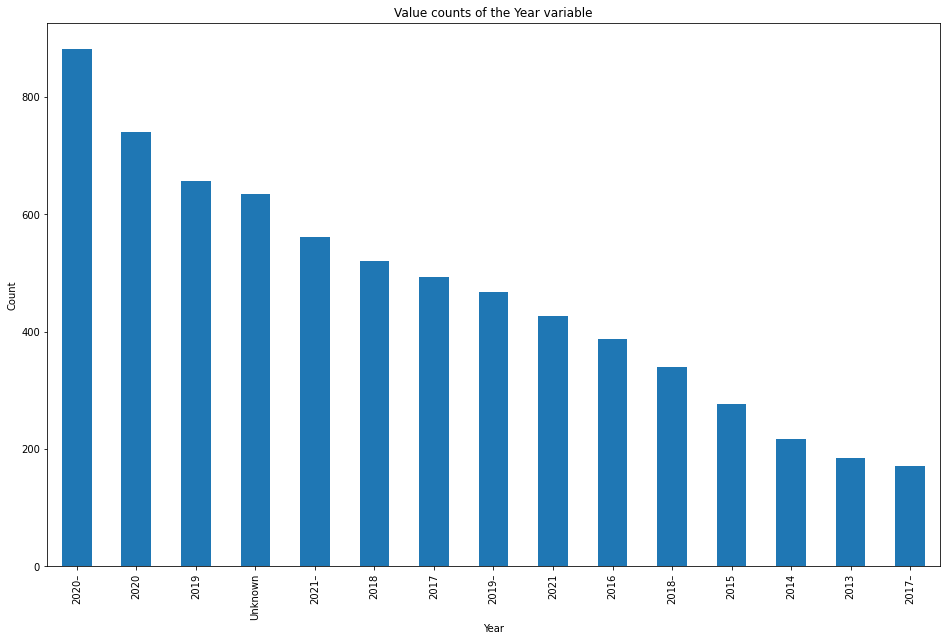

In [38]:
# Visualizing the value count of Year column
fig = plt.figure(figsize=(16, 10))

movies.Year.value_counts().head(15).plot(kind="bar")
plt.title("Value counts of the Year variable")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

In [39]:
# Remove \n from the Genre, One_Line and Stars column
for column in ['Genre','One_Line','STARS']:
    movies[column] = movies[column].str.replace("\n","").str.strip()

movies.head()

,Movies,Year,Genre,Rating,One_Line,STARS,Votes,RunTime,Gross
0,Blood Red Sky,2021,"Action, Horror, Thriller",6.1,A woman with a mysterious illness is forced in...,Director:Peter Thorwarth| Stars:Peri Baume...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,2021–,"Animation, Action, Adventure",5.0,The war for Eternia begins again in what may b...,"Stars:Chris Wood, Sarah Michelle Gellar, Lena ...","17,870",25.0,NaN
2,The Walking Dead,2010–2022,"Drama, Horror, Thriller",8.2,Sheriff Deputy Rick Grimes wakes up from a com...,"Stars:Andrew Lincoln, Norman Reedus, Melissa M...","885,805",44.0,NaN
3,Rick and Morty,2013–,"Animation, Adventure, Comedy",9.2,An animated series that follows the exploits o...,"Stars:Justin Roiland, Chris Parnell, Spencer G...","414,849",23.0,NaN
4,Army of Thieves,2021,"Action, Crime, Horror",NaN,"A prequel, set before the events of Army of th...",Director:Matthias Schweighöfer| Stars:Matt...,NaN,NaN,NaN


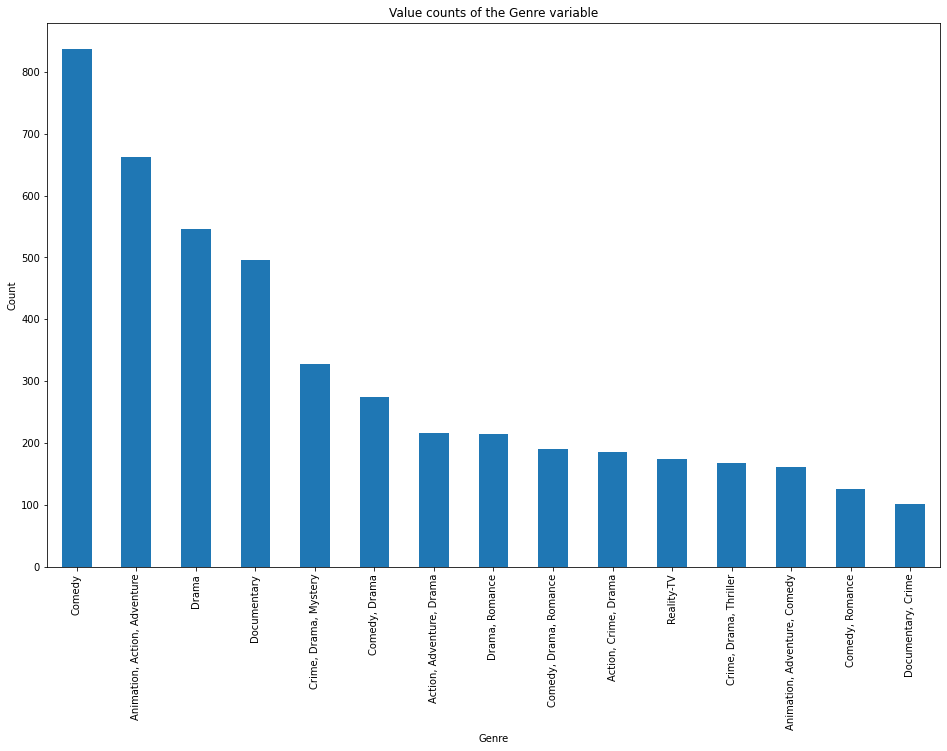

In [40]:
"""
Since only 0.82% of the Genre variable is missing, 
dropping the missing values shouldn't have a significant impact on our analysis
"""
movies['Genre'] = movies['Genre'].dropna()

# Visualizing the Genre variable
fig = plt.figure(figsize=(16, 10))

movies.Genre.value_counts().head(15).plot(kind="bar")
plt.title("Value counts of the Genre variable")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.show()

In [41]:
# Visualizing each individual genre
individual_genre_list = []
for genres in movies['Genre']:
  genres = str(genres).split(',')
  for genre in genres:
    individual_genre_list.append(genre)

genre_data = pd.DataFrame.from_dict(Counter(individual_genre_list), orient = 'index').rename(columns = {0:'Count'})
genre_data.head()

,Count
Action,1188
Horror,359
Thriller,829
Animation,1575
Action,922


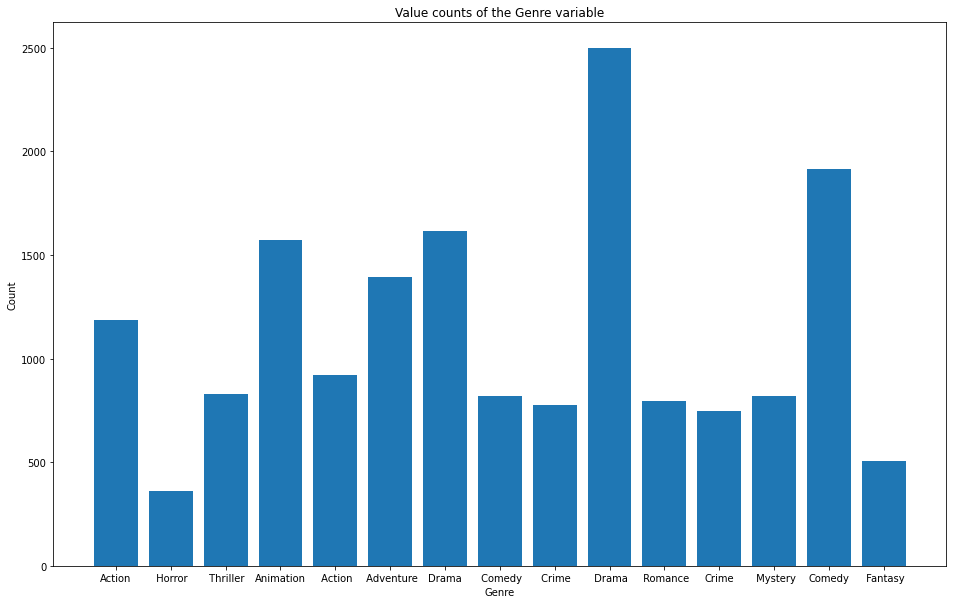

In [42]:
# Visualize only the first 15 genres
genre_data_15 = genre_data.head(15)

fig = plt.figure(figsize=(16, 10))

plt.bar(genre_data_15.index, genre_data_15['Count'])
plt.title("Value counts of the Genre variable")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.show()

In [43]:
# Describing the distribution of the Rating variable
movies.Rating.describe()

count    8168.000000
mean        6.919699
std         1.219970
min         1.100000
25%         6.200000
50%         7.100000
75%         7.800000
max         9.900000
Name: Rating, dtype: float64

In [44]:
# Replace the missing values of the Rating column with the mean value 
mean_value=movies['Rating'].mean()

movies['Rating'].fillna(value=mean_value, inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


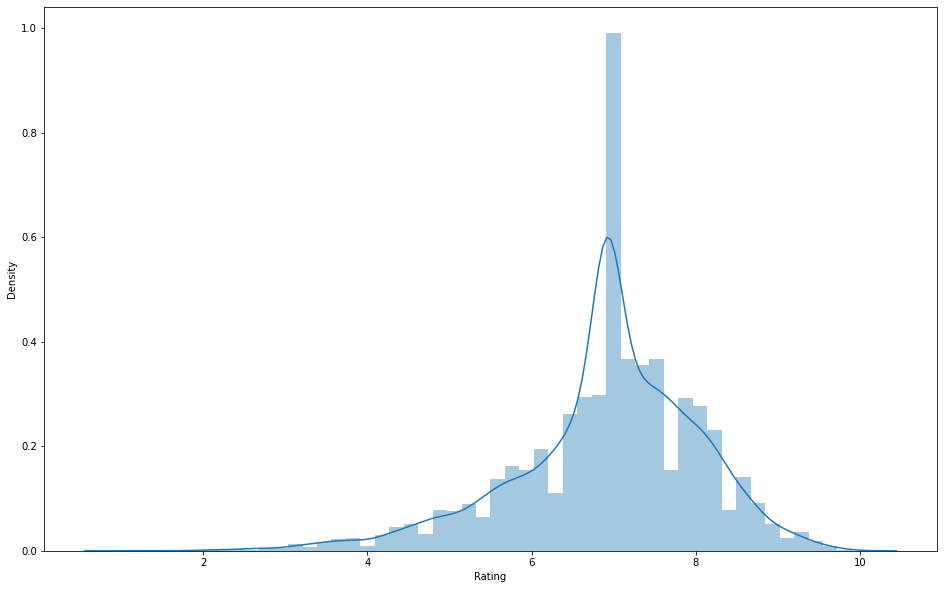

In [45]:
# Visualize the Rating variable
fig = plt.figure(figsize=(16, 10))

sns.distplot(movies['Rating'])
plt.show()

In [46]:
# Seperating the directors from the stars on the stars column
def extract_director(director):
  if 'Director' in director or 'Directors' in director:
    movie_director = str(director).split('|')[0]
    return movie_director.split(':')[1]
  else:
    return 'Unknown'

def extract_star(star):
  if 'Star' not in star or 'Stars' not in star:
    return 'Unknown'
  else:
    return star.split(":")[-1]

movies['Directors'] = movies['STARS'].apply(lambda dir: extract_director(dir))
movies['Stars'] = movies['STARS'].apply(lambda star: extract_star(star))

movies.head()

,Movies,Year,Genre,Rating,One_Line,STARS,Votes,RunTime,Gross,Directors,Stars
0,Blood Red Sky,2021,"Action, Horror, Thriller",6.100000,A woman with a mysterious illness is forced in...,Director:Peter Thorwarth| Stars:Peri Baume...,"21,062",121.0,NaN,Peter Thorwarth,"Peri Baumeister, Carl Anton Koch, Alexander Sc..."
1,Masters of the Universe: Revelation,2021–,"Animation, Action, Adventure",5.000000,The war for Eternia begins again in what may b...,"Stars:Chris Wood, Sarah Michelle Gellar, Lena ...","17,870",25.0,NaN,Unknown,"Chris Wood, Sarah Michelle Gellar, Lena Headey..."
2,The Walking Dead,2010–2022,"Drama, Horror, Thriller",8.200000,Sheriff Deputy Rick Grimes wakes up from a com...,"Stars:Andrew Lincoln, Norman Reedus, Melissa M...","885,805",44.0,NaN,Unknown,"Andrew Lincoln, Norman Reedus, Melissa McBride..."
3,Rick and Morty,2013–,"Animation, Adventure, Comedy",9.200000,An animated series that follows the exploits o...,"Stars:Justin Roiland, Chris Parnell, Spencer G...","414,849",23.0,NaN,Unknown,"Justin Roiland, Chris Parnell, Spencer Grammer..."
4,Army of Thieves,2021,"Action, Crime, Horror",6.919699,"A prequel, set before the events of Army of th...",Director:Matthias Schweighöfer| Stars:Matt...,NaN,NaN,NaN,Matthias Schweighöfer,"Matthias Schweighöfer, Nathalie Emmanuel, Ruby..."


In [47]:
movies.Directors.value_counts(normalize=True)

Unknown                    0.360368
Adam Heydt                 0.002926
Oliver Driver              0.002195
Brian Smith                0.002195
Giancarlo Volpe            0.001986
                             ...   
Anthony Stacchi            0.000105
Jing Wong, Wai-Lun Lam     0.000105
David Marconi              0.000105
Shantrelle P. Lewis        0.000105
Ian Daniel, Elliot Page    0.000105
Name: Directors, Length: 3709, dtype: float64

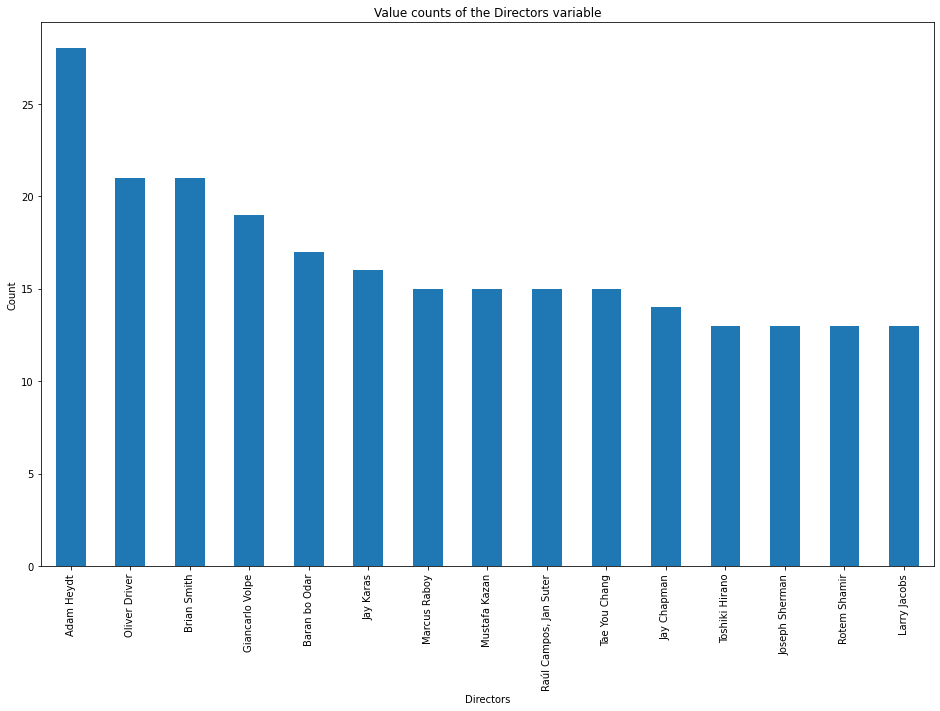

In [48]:
# Visualizing the value count of first 15 Directors column
fig = plt.figure(figsize=(16, 10))

movies[movies['Directors'] != 'Unknown']['Directors'].value_counts().head(15).plot(kind="bar")
plt.title("Value counts of the Directors variable")
plt.xlabel("Directors")
plt.ylabel("Count")
plt.show()

In [49]:
movies.Stars.value_counts(normalize=True)

Unknown                                                                          0.125732
Emmanuel Esparza, Essined Aponte, Manuel Navarro, Álvaro Benet                   0.006062
Rorrie D. Travis, Jasmeet Baduwalia, Jacqueline Scislowski, Abraham Rodriguez    0.004285
Zach Tyler, Mae Whitman, Jack De Sena, Michaela Jill Murphy                      0.003658
Aimee Carrero, Karen Fukuhara, AJ Michalka, Marcus Scribner                      0.003344
                                                                                   ...   
Francis Ford Coppola, Guillermo del Toro, Paul Greengrass, Lawrence Kasdan       0.000105
Dylan Robert, Kenza Fortas, Idir Azougli, Lisa Amedjout                          0.000105
Caroline Abras, Selton Mello, Enrique Diaz, Jonathan Haagensen                   0.000105
Yûki Kaji, Sora Amamiya, Misaki Kuno, Aoi Yûki                                   0.000105
Morgan Taylor Campbell, Jennifer Cheon Garcia, Iñaki Godoy, Rhianna Jagpal       0.000105
Name: Star

In [50]:
# Change the data type of the Votes variable and fill the missing values
movies['Votes'] = movies['Votes'].str.replace(",","")
movies['Votes'] = movies['Votes'].fillna(0)
movies['Votes'] = movies['Votes'].astype(int)
movies['Votes'] 

0        21062
1        17870
2       885805
3       414849
4            0
         ...  
9993         0
9995         0
9996         0
9997         0
9998         0
Name: Votes, Length: 9568, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


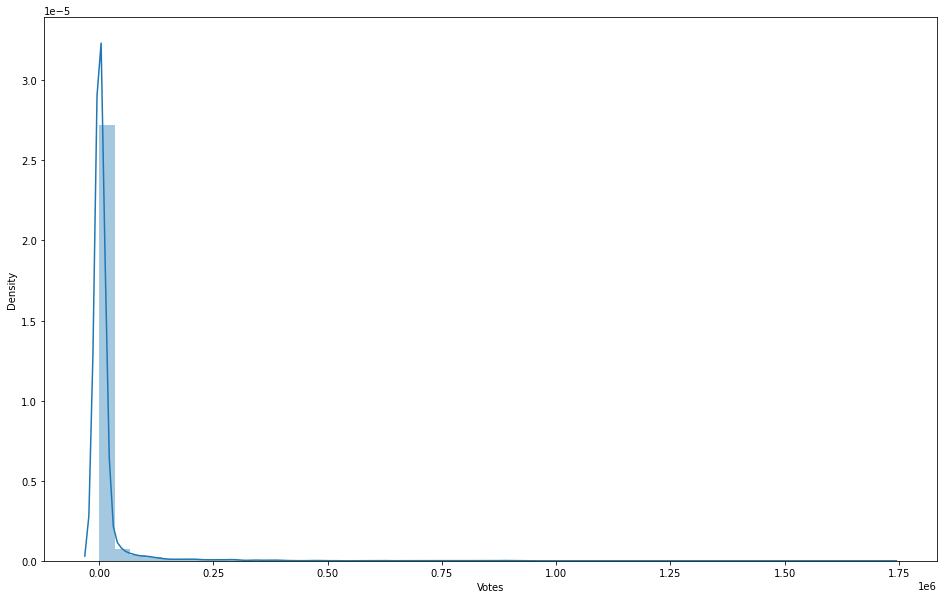

In [51]:
# The distribution of the Votes variable
fig = plt.figure(figsize=(16, 10))

sns.distplot(movies['Votes'])
plt.show()

In [52]:
# Describing the distribution of the RunTime variable
movies.RunTime.describe()

count    7008.000000
mean       68.874144
std        47.278890
min         1.000000
25%        37.000000
50%        60.000000
75%        95.000000
max       853.000000
Name: RunTime, dtype: float64

In [53]:
# Replace the missing values of the RunTime column with the mean value 
mean_value=movies['RunTime'].mean()

movies['RunTime'].fillna(value=mean_value, inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


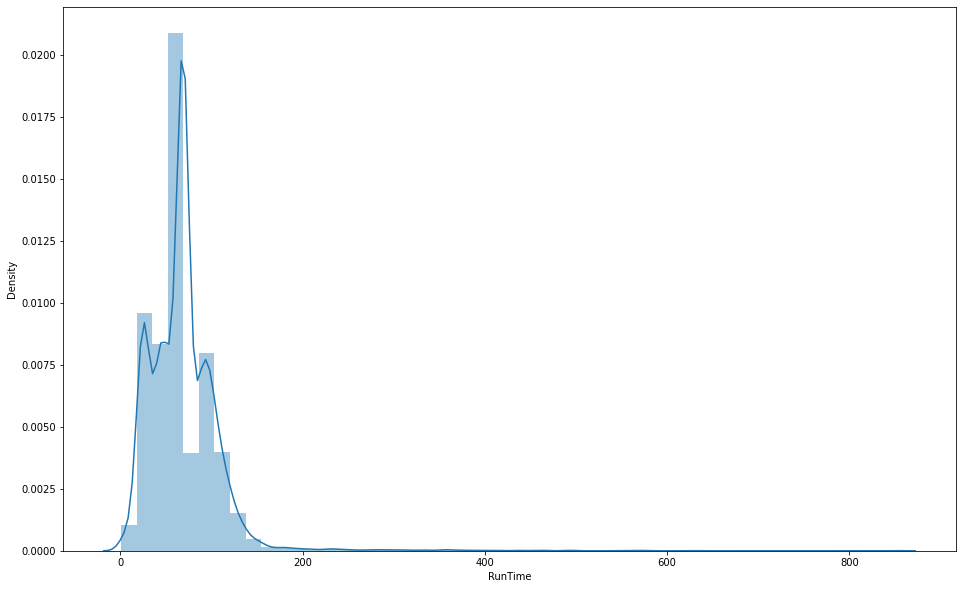

In [54]:
# Visualize the Rating variable
fig = plt.figure(figsize=(16, 10))

sns.distplot(movies['RunTime'])
plt.show()

More than 80% of the Gross variable data is missing. Filling this missing values will be very inacurate in the context of the entire data. This column can be dropped

In [56]:
# Remove the redundant columns

movies.drop(['STARS', 'Gross'], axis=1, inplace = True)
movies.head()

,Movies,Year,Genre,Rating,One_Line,Votes,RunTime,Directors,Stars
0,Blood Red Sky,2021,"Action, Horror, Thriller",6.100000,A woman with a mysterious illness is forced in...,21062,121.000000,Peter Thorwarth,"Peri Baumeister, Carl Anton Koch, Alexander Sc..."
1,Masters of the Universe: Revelation,2021–,"Animation, Action, Adventure",5.000000,The war for Eternia begins again in what may b...,17870,25.000000,Unknown,"Chris Wood, Sarah Michelle Gellar, Lena Headey..."
2,The Walking Dead,2010–2022,"Drama, Horror, Thriller",8.200000,Sheriff Deputy Rick Grimes wakes up from a com...,885805,44.000000,Unknown,"Andrew Lincoln, Norman Reedus, Melissa McBride..."
3,Rick and Morty,2013–,"Animation, Adventure, Comedy",9.200000,An animated series that follows the exploits o...,414849,23.000000,Unknown,"Justin Roiland, Chris Parnell, Spencer Grammer..."
4,Army of Thieves,2021,"Action, Crime, Horror",6.919699,"A prequel, set before the events of Army of th...",0,68.874144,Matthias Schweighöfer,"Matthias Schweighöfer, Nathalie Emmanuel, Ruby..."
